### Homework: Monte Carlo Integration

#### Consider the following integration problem:

\begin{aligned}
 I = \int_a^b g(x) dx,
\end{aligned}

where $\{ a,b \}$ = $\{1, 2.5\}$ and $g(x) = 1/(1+x^2)$.

- Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

- Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

 - Hint: The previous two questions force you to recognize that the integration problem of $I$ may not be stated as the expected value of $g(x)$.

- Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

---
# Question 1

1. Compute the expected value of $g(x)$: Write a Julia function to compute the expected value of $g(x)$ when $x \in (a,b)$ using the Monte Carlo method. That is, compute $E[g(x)]$, $x \in (a,b)$, which is NOT the same as the integration value $I$. The function should take $a$, $b$, and $n$ (the number of random draws) as inputs. The random numbers should be drawn from $[a,b]$. Show the numerical result with n=10,000.

In [35]:
using Random, Distributions
Random.seed!(1234)

function expectation(a, b, n)

    random_samples = a .+ (b - a) .* rand(n)
    g_x = 1 ./ (1 .+ random_samples.^2)
    return mean(g_x)

end

@show expectation(1, 2.5, 10000)

expectation(1, 2.5, 10000) = 0.26923436674913725


0.26923436674913725

2. Compute the integration value $I$: Write down the solution of the integration problem as a function of the expected value of $g(x)$. Write a Julia function to compute the value, where the function should take $a$, $b$, and $n$ (the number of random draws) as inputs. Do not use the change of variables (yet). Show the numerical result with n=10,000.

In [36]:
using Distributions

function MC_integration(a, b, n)

    random_samples = a .+ (b - a) .* rand(n)
    g_x = 1 ./ (1 .+ random_samples.^2)
    return (b-a) * mean(g_x)

end

@show MC_integration(1, 2.5, 10000)

MC_integration(1, 2.5, 10000) = 0.40393674528035195


0.40393674528035195

3. Compute the integration value $I$ using changes of variables: Write a Julia function which uses the change of variables to convert the problem's domain to $[0,1]$. The function should include the transformation rule and the Jacobian, and it should take $a$, $b$, and $n$ (the number of random draws) as inputs. Show the numerical result with n=10,000.

In [37]:
using Distributions

function MC_integration_with_transformation(a, b, n)

    u = rand(n)
    x = a .+ (b - a) .* u  # change of variables
    g_x = 1 ./ (1 .+ x.^2)
    j = b - a  # jacobian
    return mean(g_x) * j

end

@show MC_integration_with_transformation(1, 2.5, 10000)

MC_integration_with_transformation(1, 2.5, 10000) = 0.40529617166503207


0.40529617166503207

---

#### Consider the following integration problem: 

\begin{aligned}
   I = \int_{-\infty}^\infty \exp\left(-\frac{1}{3}x^2\right)\sqrt{1+x^2} dx.
\end{aligned}
  
- Use Monte Carlo integration to compute the following integration.
  - transform the infinite domain to $[0,1]$; mind the Jacobian;
  - draw random numbers from $[0,1]$;
  - compute the integration with a given $n$.
- Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.
 
 

---
# Question 2

1. Use Monte Carlo integration to compute the following integration.

In [38]:
using Distributions

function MC_integration1(n)

    t = rand(n)
    x = (2 .* t .- 1) ./ (t .- t.^2)
    f_x = exp.(-1/3 .* x.^2) .* sqrt.(1 .+ x.^2)
    j = (2 .* t.^2 .- 2 .* t .+ 1) ./ (t.^2 .- t).^2
    g_t = f_x .* j
    return mean(g_t)

end

@show MC_integration1(10000)


MC_integration1(10000) = 4.628554212687781


4.628554212687781

2. Inspect the convergence path by computing $I$ using different $n$, and draw a graph with $n$ and $I$ on the horizontal and vertical axes, respectively.

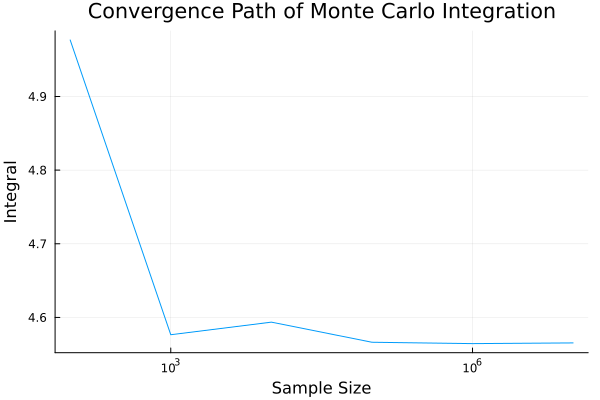

In [39]:
using Distributions, Plots

# inspect the convergence path
n_values = [10^i for i in 2:7]
I_values = [MC_integration1(n) for n in n_values]

# plot graph
plot(n_values, I_values, title = "Convergence Path of Monte Carlo Integration", xlabel = "Sample Size", ylabel = "Integral", xscale = :log10, legend = false) |> display

---